In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from pathlib import Path

%matplotlib inline

# set data frames
whale_data = Path("whale_returns.csv")
algo_data = Path("algo_returns.csv")
otex_data = Path("otex_historical.csv")
sp_tsx_data = Path("sp_tsx_history.csv")
shop_data = Path("shop_historical.csv")
i_hist_data = Path("l_historical.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_data = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_data = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_data = pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_data = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
i_hist_data = pd.read_csv(i_hist_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

otex_data.head() 

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [55]:
#csv_data.head()
#csv_data.isnull()
#read whales algo_data and sptsx_data into a data frame

combined_df = pd.concat([whale_data, algo_data, sp_tsx_data], axis="columns", join="inner")
#combined_df.rename(columns={'PAULSON & CO.INC.': 'PAULSON'}, inplace=True)# Display a few rows from one DataFrame

# Sort datetime index in ascending order (past to present)
combined_df = combined_df.sort_index()


# Display a few rows
#combined_df.head() 

combined_df.head()
combined_df.isnull()
combined_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,"$15,133.85"
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,"$15,082.84"
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,"$15,103.11"
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,"$14,952.50"
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,"$14,854.49"
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,"$16,576.10"
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,"$16,613.46"
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,"$16,600.37"


In [56]:


# describe
combined_df.describe(include='all')

combined_df['Close'] = combined_df['Close'].astype(str)  # cast to string

# all the string surgery goes in here
combined_df['Close'] = combined_df["Close"].str.replace('$', '')
combined_df['Close'] = combined_df["Close"].str.replace(',', '')


combined_df['Close'] = combined_df['Close'].astype('float')

combined_df.dropna()

#combined_df['Close'] = combined_df['Close'].astype(float)  # cast back to appropriate type




/Users/thehalpins/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37


In [57]:
#clean data
combined_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
Close                          float64
dtype: object

In [58]:
combined_df.count()
combined_df.isnull().sum()
combined_df.duplicated() 
combined_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,15264.05
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50


In [59]:
#The whale portfolios and algorithmic portfolio CSV files contain daily returns, 
#but the S&P TSX 60 CSV file contains closing prices. 
#Convert the S&P TSX 60 closing prices to daily returns.

combined_df['Close'] = combined_df['Close'].pct_change()
combined_df.head()
#daily_returns_sptsx = combined_df['Close'].pct_change()
#daily_returns_sptsx.head() 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


<AxesSubplot:xlabel='Date'>

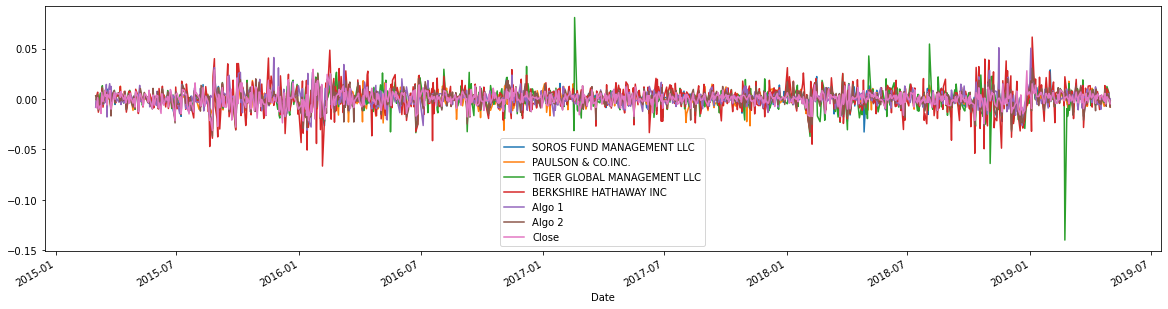

In [60]:
#Conduct Quantitative Analysis
combined_df.plot(figsize=(20,5))

In [61]:
#cumulative returns
cumulative_return = (1 + combined_df).cumprod()


In [62]:
cumulative_return.head() * 100

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,99.184223,100.320001,NaN
2015-03-03,99.873449,99.501948,99.950447,99.343133,98.991595,100.224749,99.147015
2015-03-04,100.096158,99.824462,99.697175,99.761668,98.141376,100.466913,98.812831
2015-03-05,100.498145,100.231352,99.931927,100.432697,98.047646,100.901247,98.945627
2015-03-06,99.703671,99.873121,99.084387,99.117224,97.561649,99.744886,97.958930


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

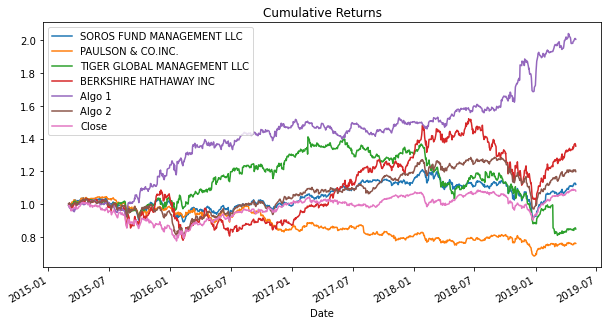

In [63]:
cumulative_return.plot(figsize=(10,5), title="Cumulative Returns") 

<AxesSubplot:>

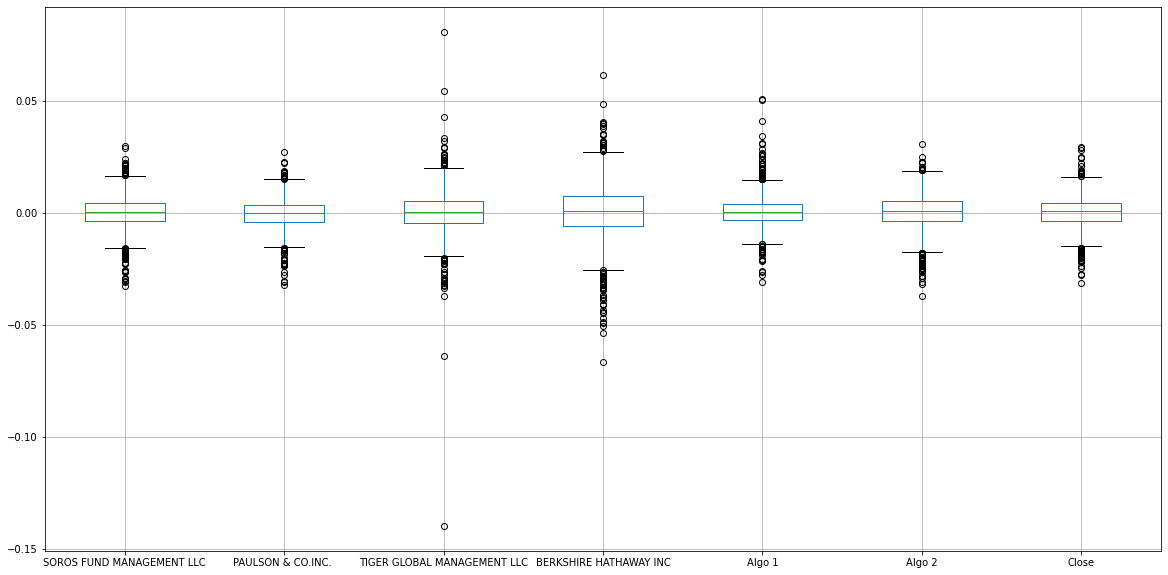

In [64]:
combined_df.boxplot(figsize=(20,10))

<AxesSubplot:>

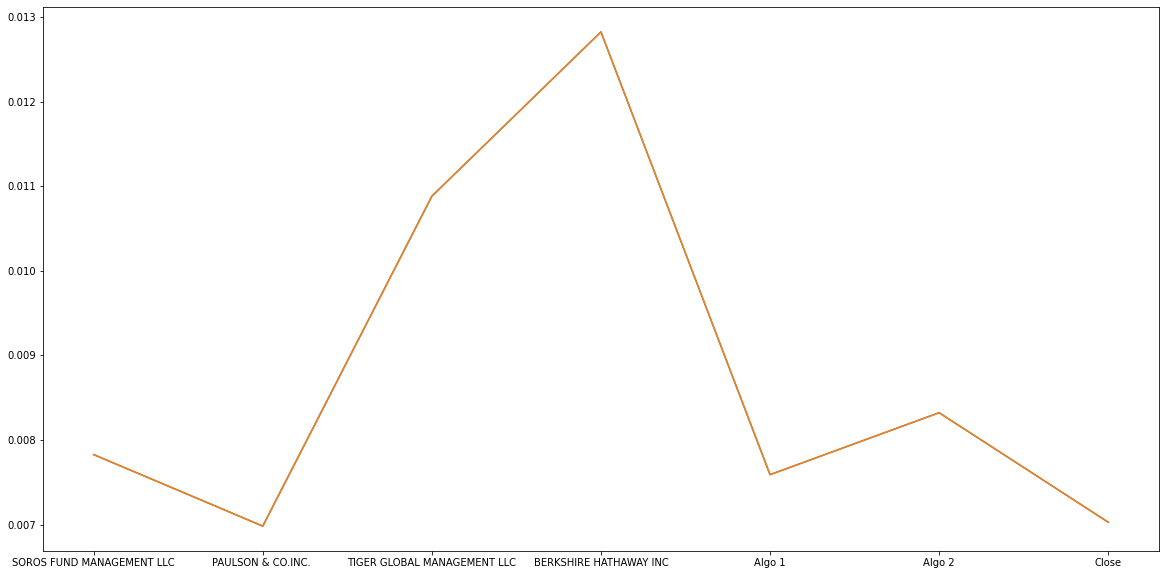

In [65]:
#Calculate the standard deviation for each portfolio.

combined_df.std().plot(figsize=(20,10))

#Calculate the Annualized Standard Deviation.

combined_df.std().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

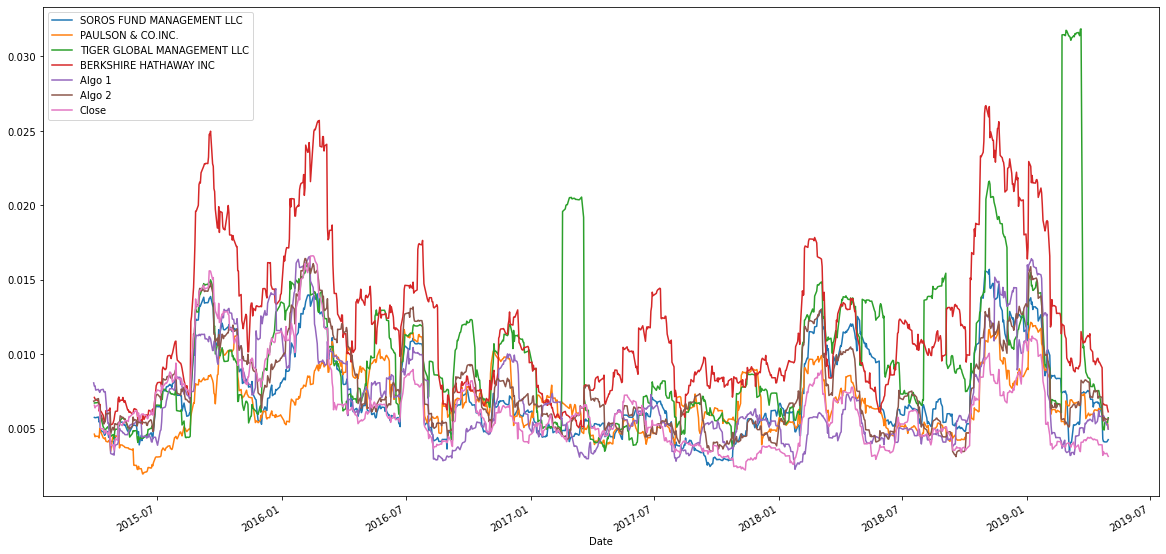

In [66]:
#Rolling Statistics

#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.

combined_df.rolling(window=21).std().plot(figsize=(20,10))


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


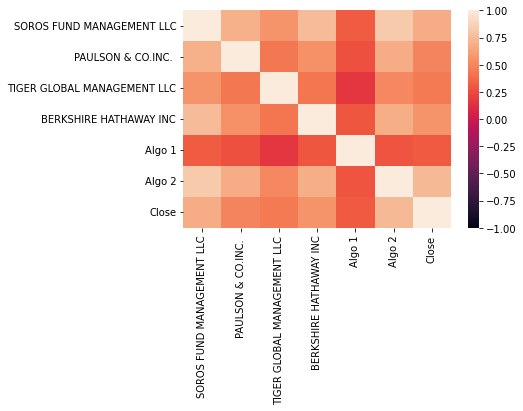

In [67]:
#Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.

price_correlation = combined_df.corr() 
sns.heatmap(price_correlation, vmin=-1, vmax=1)
combined_df.head()

In [68]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

#combined_df.head()
#paulson_df = combined_df.drop(columns=["TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC","Algo 1","Algo 2"])

#cols = [2,3,4,5,6]
#combined_df.drop(combined_df.columns[cols],axis=1,inplace=True)

#paulson_df.head()

In [69]:

# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
#daily_returns = paulson_df.pct_change()
#daily_returns.head() 
#rolling_covariance = daily_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=30).cov(daily_returns["PAULSON & CO.INC."])
#rolling_covariance = daily_returns['MSFT'].rolling(window=30).cov(daily_returns['SP500'])


In [70]:
#Sharpe Ratios
#Investment managers and their institutional investors look at the return-to-risk ratio, 
#not just the returns. After all, if you have two portfolios that each offer a 10% return, 
#yet one is lower risk, you would invest in the lower-risk portfolio, right?


#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.


#determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


In [71]:
#calculate daily returns

daily_returns = combined_df.pct_change()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,-0.761929,-1.296713,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.398717
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-8.420220


In [72]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()

# Display correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.002845,0.022161,0.000450,-0.000134,-0.005714,-0.002622
PAULSON & CO.INC.,0.002845,1.000000,0.035728,0.002077,0.006478,0.010906,0.004685
TIGER GLOBAL MANAGEMENT LLC,0.022161,0.035728,1.000000,-0.011667,-0.002474,-0.004694,0.002063
BERKSHIRE HATHAWAY INC,0.000450,0.002077,-0.011667,1.000000,0.001532,0.003727,-0.001586
Algo 1,-0.000134,0.006478,-0.002474,0.001532,1.000000,0.000593,-0.000771
Algo 2,-0.005714,0.010906,-0.004694,0.003727,0.000593,1.000000,-0.000142
Close,-0.002622,0.004685,0.002063,-0.001586,-0.000771,-0.000142,1.000000


<AxesSubplot:>

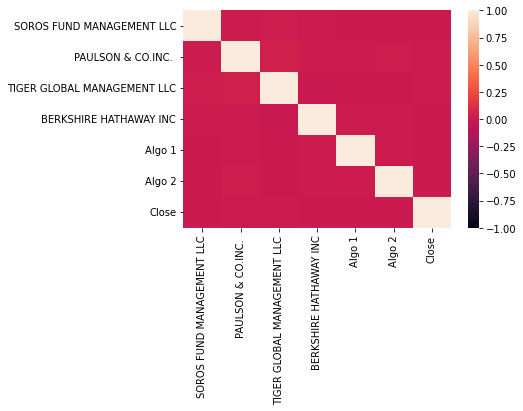

In [73]:
sns.heatmap(correlation, vmin=-1, vmax=1) 

In [74]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (correlation.mean() * 252) / (correlation.std() * np.sqrt(252))

# Display sharpe ratios
sharpe_ratios

SOROS FUND MANAGEMENT LLC      6.117475
PAULSON & CO.INC.              6.440540
TIGER GLOBAL MANAGEMENT LLC    6.283651
BERKSHIRE HATHAWAY INC         5.961227
Algo 1                         6.036445
Algo 2                         6.032111
Close                          6.011263
dtype: float64

<AxesSubplot:>

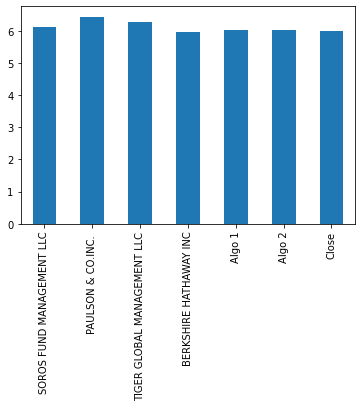

In [75]:
sharpe_ratios.plot.bar()

In [101]:
#Create a custom portfolio
#Download the data as CSV files and calculate the portfolio returns.
combined_df2 = pd.concat([otex_data, shop_data, i_hist_data], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df2 = combined_df2.sort_index()
#combined_df2 = combined_df2.columns = ['OTEX','CLOSE','SHOP','CLOSE','L','CLOSE']
combined_df2.head()
#combined_df2.describe()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,SHOP,132.06,L,57.99
2018-01-03,OTEX,43.07,SHOP,135.15,L,57.41
2018-01-04,OTEX,42.91,SHOP,137.46,L,57.42
2018-01-05,OTEX,42.57,SHOP,137.26,L,57.42
2018-01-08,OTEX,42.16,SHOP,139.51,L,56.86


In [104]:
#set daily returns
daily_returns_cust = combined_df2["Close"].pct_change()
#daily_returns_cust = daily_returns_cust.columns = ['OTEX','SHOP','L']
daily_returns_cust.head() 
#daily_returns_cust.plot()

,Close,Close,Close
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753


In [105]:

#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.

# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.4, 0.2, 0.2]

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

ValueError: Dot product shape mismatch, (1030, 7) vs (3,)